In [1]:
import pandas as pd

df = pd.read_csv('QRV.csv', encoding='windows-1252')

# replacing blank vairant with what it represent: all car types
df['Variant'] = df['Variant'].fillna('QRV: Car Type{Venti,Tall,Grande}')




In [2]:
# If procurement code is 'phantom' or 'make', set 'sub component' to empty
# 7736 changes
df.loc[(df['Procurement Code'] == 'Phantom') | (df['Procurement Code'] == 'Make'), 'Sub Component Code'] == pd.NA

0        False
1        False
2        False
3        False
4        False
         ...  
69372    False
69374    False
69377    False
69378    False
69381    False
Name: Sub Component Code, Length: 7736, dtype: bool

In [3]:
## Get accurate level of each part, compare to given level
df["Actual Level"] = df["Key"].str.count("-") + 1
num_different = 0
for index, row in df.iterrows():
    if row["Actual Level"] != row["Level"]:
        num_different += 1
# 147 rows where actual level doesn't match given level
print(num_different)

# move column 'Actual Level' to the beginning
df = df[["Actual Level"] + [col for col in df.columns if col != "Actual Level"]]

df


147


,Actual Level,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
0,1,1,EV00004608,BODY,NaN,EV00004608,QR Vehicle,NaN,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
1,2,2,EV00004608-SY00002272,BODY,NaN,SY00002272,BODY,EV00004608,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
2,3,3,EV00004608-SY00002272-SB00007686,BODY,STRUCTURE,SB00007686,STRUCTURE,SY00002272,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
3,4,4,EV00004608-SY00002272-SB00007686-GP00005889,BODY,STRUCTURE,GP00005889,SEALS,SB00007686,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
4,5,5,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,CAY00010323,BODY STORE SEALANT,GP00005889,Pheobe Buffay,Phantom,NaN,QRV: Car Type{Venti}
...,...,...,...,...,...,...,...,...,...,...,...,...
69380,9,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,SC00013805,Foam 607P,PT01597040,Duke Weaselton,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69381,8,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01759813,TOUCH COVER; NEGATIVE - LARGE,PT01759805,Swagman,Make,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69382,8,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01759815,TOUCH COVER; POSITIVE - LARGE,PT01759805,Swagman,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69383,8,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00052426,SHEAR WALL; 3BOLT,PT01759805,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


In [4]:
## Create Node class
class Node:
    def __init__(self, part_number, parent=None, procurement=None, subcomponent=None):
        self.part_number = part_number
        self.duplicate_number = 0
        self.add_parent(parent) # is a node or none
        self.children = {}
        self.procurement = procurement
        self.subcomponent = subcomponent

    def add_parent(self, parent):
        if parent is None:
            self.parent = None
            return
        
        self.parent = parent
        self.parent.children[self.part_number] = self

In [5]:
## Sort list by 'actual level'
sorted_df = df.sort_values(by = 'Actual Level')
sorted_df

,Actual Level,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
0,1,1,EV00004608,BODY,NaN,EV00004608,QR Vehicle,NaN,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
22458,2,2,EV00004608-SY00007705,CATALYST,NaN,SY00007705,CATALYST,EV00004608,Rachel Green,Phantom,NaN,
18150,2,2,EV00004608-SY00002460,INTERIOR,NaN,SY00002460,INTERIOR,EV00004608,Rachel Green,Phantom,NaN,"QRV: Handed Drive{LHD } AND Car Type{Venti,Tall}"
21984,2,2,EV00004608-SY00005795,BATTERY PACK,NaN,SY00005795,BATTERY PACK,EV00004608,Rachel Green,Phantom,NaN,QRV: Battery{LMAO 5 Module} AND Wheel Drive{Fr...
21995,2,2,EV00004608-SY00004838,AUTOPILOT,NaN,SY00004838,AUTOPILOT,EV00004608,Rachel Green,Phantom,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
39138,12,12,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT00963201,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
39137,12,12,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT00963201,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
39136,12,12,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT00963201,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
39146,12,12,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT00963201,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


### Create Tree

In [6]:
def check_procurement_validity(cur_node: Node, parent_node: Node) -> bool:
    cur_procurement = cur_node.procurement
    cur_subcomponent = cur_node.subcomponent
    parent_procurement = parent_node.procurement
    parent_subcomponent = parent_node.subcomponent

    if parent_procurement == 'Buy' and pd.isnull(parent_subcomponent):
        if ((cur_procurement == 'Buy' and cur_subcomponent == 'Consignment')
            or (cur_procurement == 'Buy' and cur_subcomponent == 'DirectedBuy')
            or (cur_procurement == 'Buy' and cur_subcomponent == 'SupplierBuy')
            or (cur_procurement == 'Phantom')):
            return True
    elif (parent_procurement == 'Make' or parent_procurement == 'Phantom'):
        if ((cur_procurement == 'Buy' and pd.isnull(cur_subcomponent))
            or (cur_procurement == 'Phantom')
            or (cur_procurement == 'Make')):
            return True
    elif ((parent_procurement == 'Buy' and parent_subcomponent == 'DirectedBuy')
          or (parent_procurement == 'Buy' and parent_subcomponent == 'Consignment')):
        if ((cur_procurement == 'Buy' and cur_subcomponent == 'DirectedBuy')
            or (cur_procurement == 'Buy' and cur_subcomponent == 'SupplierBuy')
            or (cur_procurement == 'Phantom')):
            return True
    elif (parent_procurement == 'Buy' and parent_subcomponent == 'Supplier'):
        if ((cur_procurement == 'Buy' and cur_subcomponent == 'SupplierBuy')
            or (cur_procurement == 'Phantom')):
            return True
    
    return False

In [7]:
## Create lists to hold all invalid rows (type Series) as original df
missing_parent_row_list = []
invalid_procurement_row_list = []

## Crete lists to hold all valid rows
valid_row_list = []

## 1st level has one Node
root = Node(part_number='EV00004608', parent=None, procurement='Phantom', subcomponent='nan')

## Each valid node in a level becomes a parent for the next level
# cur_parents, next_parents are dictionaries with [part_id: Node]
cur_parents = {}
cur_parents['EV00004608'] = root
next_parents = {}

## Iterate through each level
for level in range(2, sorted_df['Actual Level'].max()+1):
    level_df = sorted_df[sorted_df['Actual Level'] == level]

    for index, row in level_df.iterrows():
        ## Check if cur_row has a valid parent
        ## If yes, make a cur_node. If no, add row to invalid df
        if row['Parent'] in cur_parents.keys():
            parent_node = cur_parents[row['Parent']]
            cur_node = Node(part_number=row['Part Number'],parent=parent_node, procurement = row['Procurement Code'], subcomponent=row['Sub Component Code'])
        else:
            missing_parent_row_list.append(row)
            continue

        ## Check procurement validity of cur Node
        ## If valid, go to next row
        ## If invalid, add row to invalid row list
        if check_procurement_validity(cur_node, parent_node):
            ## Add part number and cur Node to next parents
            next_parents[row['Part Number']] = cur_node
        else:
            invalid_procurement_row_list.append(row)
            continue
        
        valid_row_list.append(row)

    ## next_parents become the cur_parents of next level
    cur_parents = next_parents


In [8]:
## Convert row lists to df
missing_parent_df = pd.DataFrame(missing_parent_row_list)
invalid_procurement_df = pd.DataFrame(invalid_procurement_row_list)
valid_df = pd.DataFrame(valid_row_list)
invalid_procurement_df

,Actual Level,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
23238,6,6,EV00004608-SY00001962-SB00008014-GP00008718-CA...,ELECTRIC,POWER DISTRIBUTION SUBSYSTEM,PT00023313,LHD: HARNESS SURFBOARD,CAY00005298,Lala,Buy,SupplierBuy,QRV: Car Type{Grande} AND Handed Drive{LHD }
23290,6,6,EV00004608-SY00001962-SB00008014-GP00008718-CA...,ELECTRIC,POWER DISTRIBUTION SUBSYSTEM,PT00022533,LHD: HARNESS CARGO,CAY00008365,Lala,Buy,SupplierBuy,QRV: Handed Drive{LHD } AND Car Type{Tall} OR ...
23237,6,6,EV00004608-SY00001962-SB00008014-GP00008718-CA...,ELECTRIC,POWER DISTRIBUTION SUBSYSTEM,PT00026417,LHD: HARNESS SURFBOARD,CAY00005298,Rico Suave,Buy,DirectedBuy,QRV: Car Type{Grande} AND Handed Drive{LHD }
11143,6,6,EV00004608-SY00002272-SB00007686-GP00004114-CA...,BODY,STRUCTURE,PT00093801,ASSY SUPPORT BRACKET - 2,CAY00002722,Tom Haverford,Buy,SupplierBuy,QRV: Car Type{Tall}
11025,6,6,EV00004608-SY00002272-SB00007686-GP00004114-CA...,BODY,STRUCTURE,PT00093796,ASSY SUPPORT BRACKET - 1,CAY00002722,Tom Haverford,Buy,SupplierBuy,QRV: Car Type{Tall}
...,...,...,...,...,...,...,...,...,...,...,...,...
44718,11,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01401121,CURRENT COLLECTOR - POS - TOTE MOLECULE,PT01401118,Duke Weaselton,Make,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
45627,11,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01401121,CURRENT COLLECTOR - POS - TOTE MOLECULE,PT01401118,Duke Weaselton,Make,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
49263,11,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01401121,CURRENT COLLECTOR - POS - TOTE MOLECULE,PT01401118,Duke Weaselton,Make,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
47445,11,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01401121,CURRENT COLLECTOR - POS - TOTE MOLECULE,PT01401118,Duke Weaselton,Make,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


In [9]:
missing_parent_df

,Actual Level,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
17808,6,6,EV00004608-SY00001626-SB00003761-GP00008503-CA...,CHASSIS,BRAKES,PT00093565,BRAKE LINE; MASTER CYL 2; RESERVOIR; VENTI_TALL,CAY00005TALL,Squidward Tentacles,Buy,NaN,QRV: Car Type{Venti}
20600,6,6,EV00004608-SY00002460-SB00010424-GP00011664-CA...,INTERIOR,TRIM,PT00017100,CARGO BLOCKHEAD TRIM PANEL ASSY UPR VENTI-TALL,CAY00003TALL,Roz,Buy,SupplierBuy,QRV: Car Type{Tall} AND Handed Drive{LHD }
16854,7,7,EV00004608-SY00001626-SB00005177-GP00008104-CA...,CHASSIS,SUSPENSION,PT00022601,BEAM AXLE -QRV GRANDE,PT00014713,Drax,Make,SupplierBuy,QRV: Car Type{Grande}
16855,7,7,EV00004608-SY00001626-SB00005177-GP00008104-CA...,CHASSIS,SUSPENSION,PT00079613,BUSHING - LATERAL; TRAILING ARM; QRV REAR AXLE,PT00014713,Korg,Buy,DirectedBuy,
22627,7,7,EV00004608-SY00001962-SB00004439-GP00008983-CA...,ELECTRIC,HARDWARE - LOW VOLTAGE,SC00013731,Bolt 6MM Type P4,PT00002235,Lisa Simpson,Buy,NaN,"QRV: Handed Drive{LHD } AND Car Type{Grande,Ve..."
...,...,...,...,...,...,...,...,...,...,...,...,...
39138,12,12,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT00963201,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
39137,12,12,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT00963201,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
39136,12,12,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT00963201,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
39146,12,12,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT00963201,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


In [10]:
valid_df

,Actual Level,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
22458,2,2,EV00004608-SY00007705,CATALYST,NaN,SY00007705,CATALYST,EV00004608,Rachel Green,Phantom,NaN,
18150,2,2,EV00004608-SY00002460,INTERIOR,NaN,SY00002460,INTERIOR,EV00004608,Rachel Green,Phantom,NaN,"QRV: Handed Drive{LHD } AND Car Type{Venti,Tall}"
21984,2,2,EV00004608-SY00005795,BATTERY PACK,NaN,SY00005795,BATTERY PACK,EV00004608,Rachel Green,Phantom,NaN,QRV: Battery{LMAO 5 Module} AND Wheel Drive{Fr...
21995,2,2,EV00004608-SY00004838,AUTOPILOT,NaN,SY00004838,AUTOPILOT,EV00004608,Rachel Green,Phantom,NaN,
22461,2,2,EV00004608-SY00001962,ELECTRIC,NaN,SY00001962,ELECTRIC,EV00004608,Rachel Green,Phantom,NaN,QRV: Car Type{Grande} AND Handed Drive{LHD }
...,...,...,...,...,...,...,...,...,...,...,...,...
48004,11,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT01401111,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
48005,11,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT01401111,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
48006,11,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT01401111,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
48008,11,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00097990,ACQUA PANNA,PT01401111,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


# Data Visualization

In [11]:
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

/tmp/ipykernel_68/3286389662.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


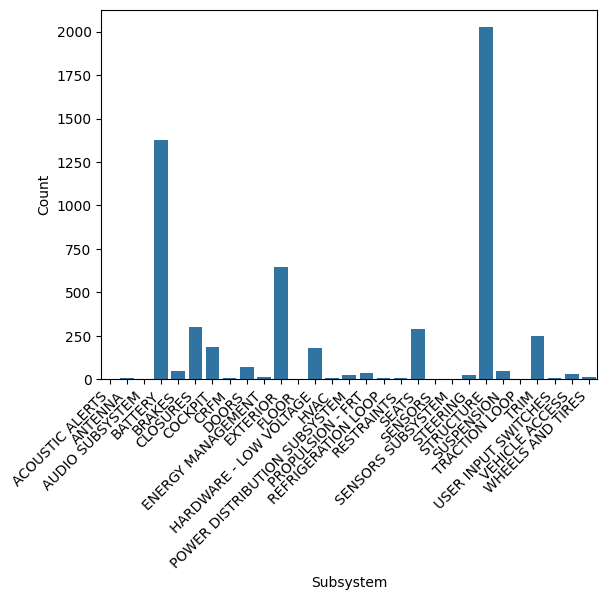

In [12]:
val, cnt = np.unique(invalid_procurement_df['Subsystem'], return_counts=True)
ax = sbn.barplot(x=val, y=cnt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.xlabel('Subsystem')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_68/117311996.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


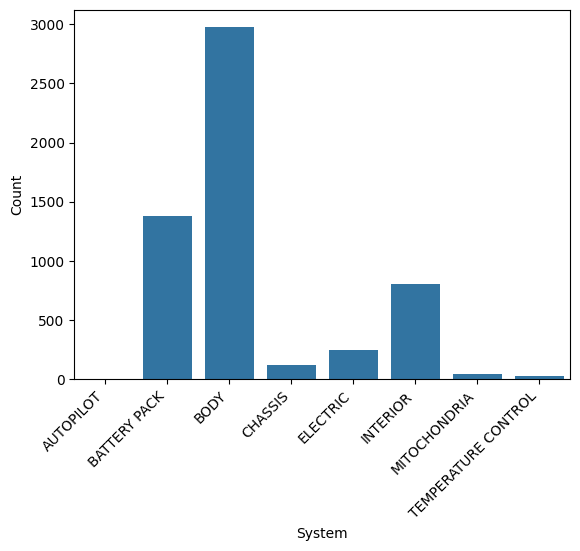

In [13]:
val, cnt = np.unique(invalid_procurement_df['System'], return_counts=True)
ax = sbn.barplot(x=val, y=cnt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.xlabel('System')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_68/1536128055.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


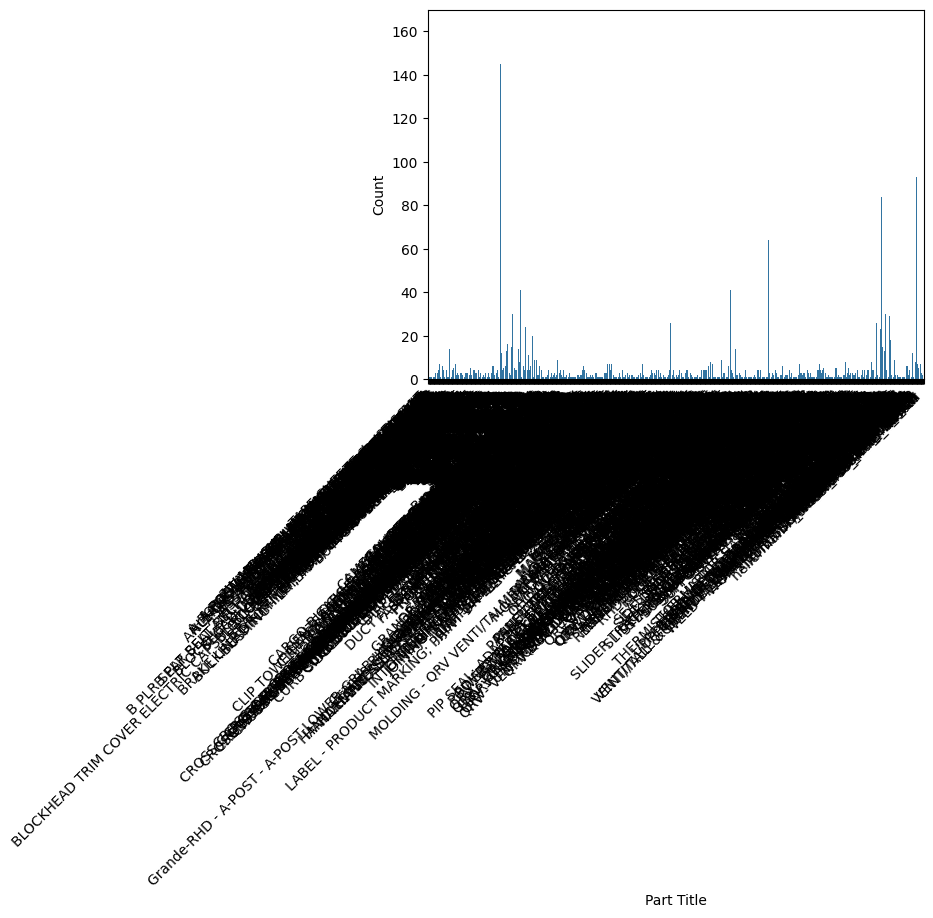

5611


In [20]:
val, cnt = np.unique(invalid_procurement_df['Part Title'], return_counts=True)
ax = sbn.barplot(x=val, y=cnt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.xlabel('Part Title')
plt.ylabel('Count')
plt.show()
total_count = np.sum(cnt)
print(total_count)

/tmp/ipykernel_68/1690313705.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


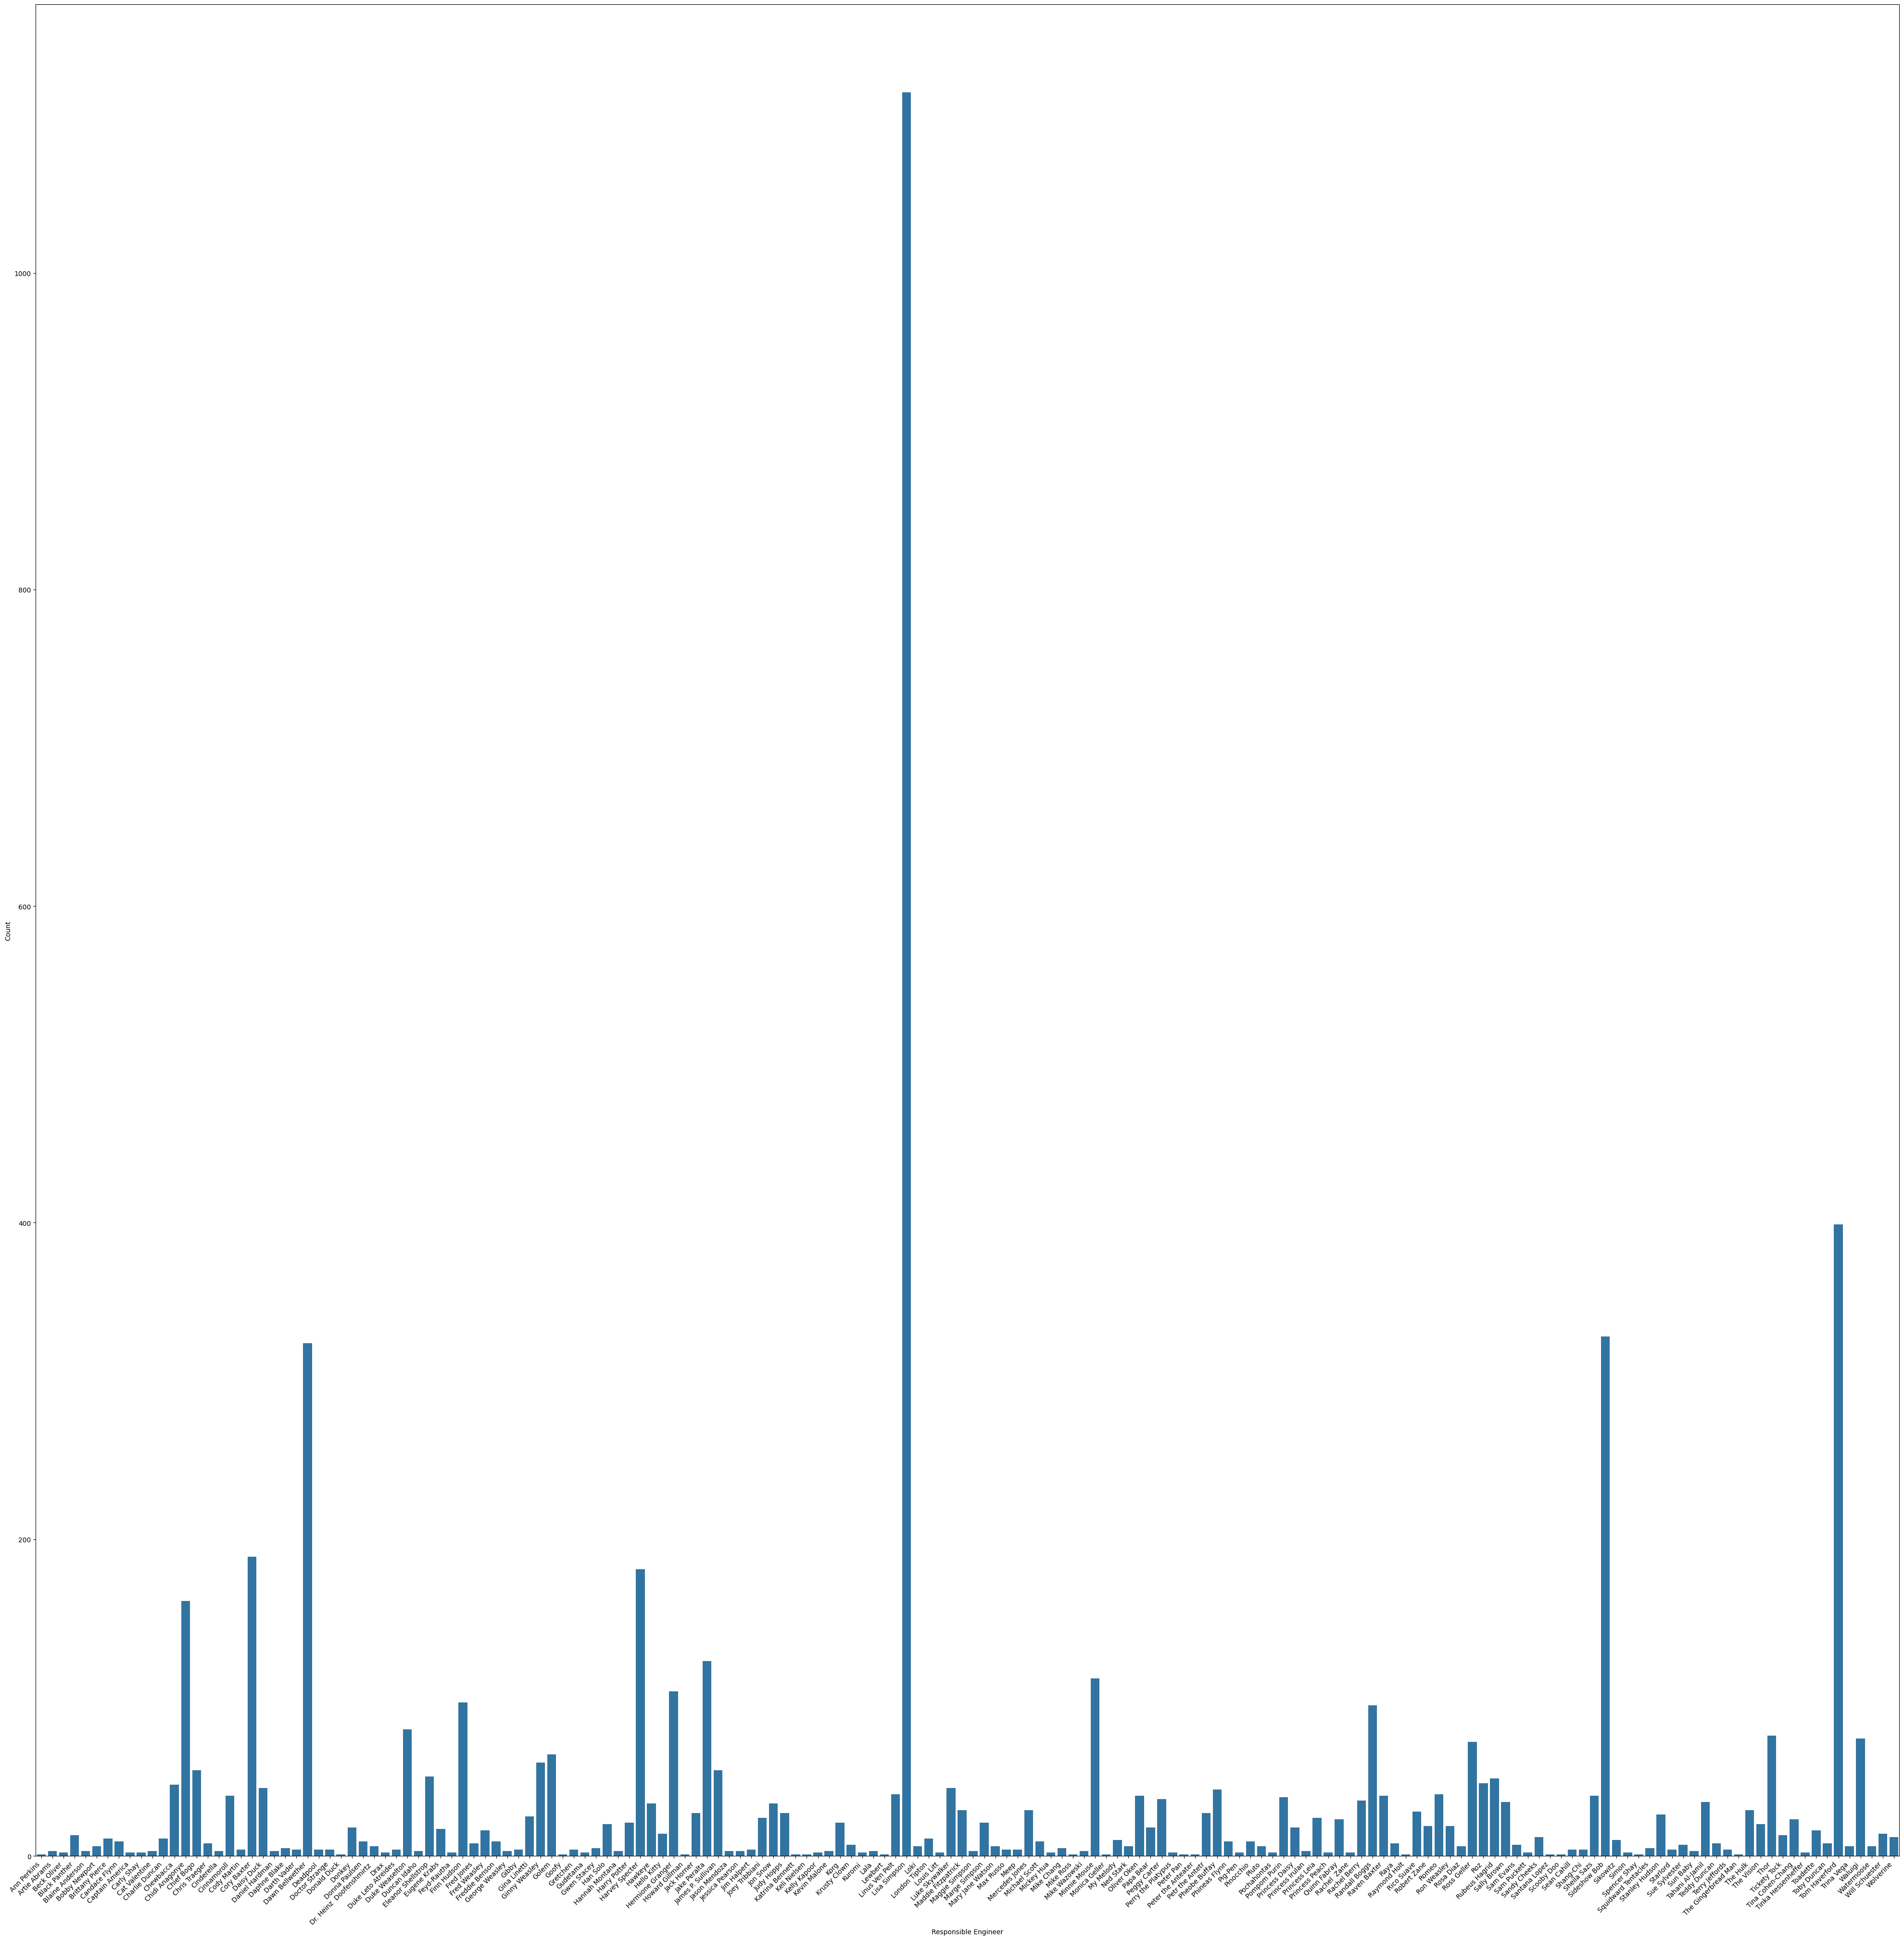

In [19]:
val, cnt = np.unique(invalid_procurement_df['Responsible Engineer'], return_counts=True)
plt.figure(figsize=(50,50))
ax = sbn.barplot(x=val, y=cnt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.xlabel('Responsible Engineer')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_68/2378111206.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


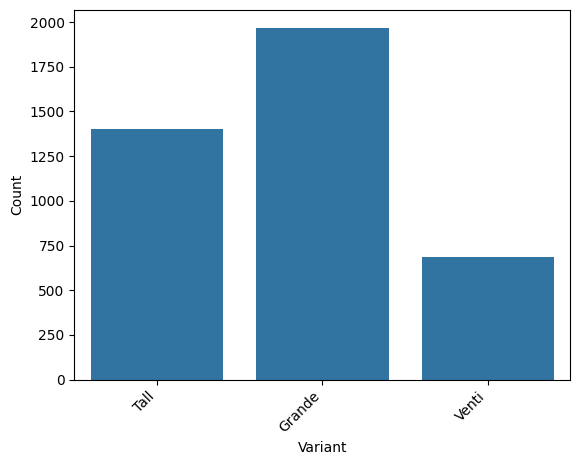

0.29991449337323645
0.22903338373851342
0.17533965649833377


In [16]:
## Graph by car sizes in 'Variant'
labels = ['Tall', 'Grande', 'Venti']
values = [0, 0, 0]

for index, row in invalid_procurement_df.iterrows():
    variant = row['Variant']
    if 'Tall' in variant:
        values[0] += 1
    elif 'Grande' in variant:
        values[1] += 1
    elif 'Venti' in variant:
        values[2] += 1


# plt.figure(figsize=(25, 25))
ax = sbn.barplot(x=labels, y=values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.xlabel('Variant')
plt.ylabel('Count')
plt.show()

## Get percentage of invalid parts by car size
valid_values = [0, 0, 0]

for index, row in valid_df.iterrows():
    variant = row['Variant']
    if 'Tall' in variant:
        valid_values[0] += 1
    elif 'Grande' in variant:
        valid_values[1] += 1
    elif 'Venti' in variant:
        valid_values[2] += 1

print(values[0]/valid_values[0])
print(values[1]/valid_values[1])
print(values[2]/valid_values[2])

/tmp/ipykernel_68/1571691753.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


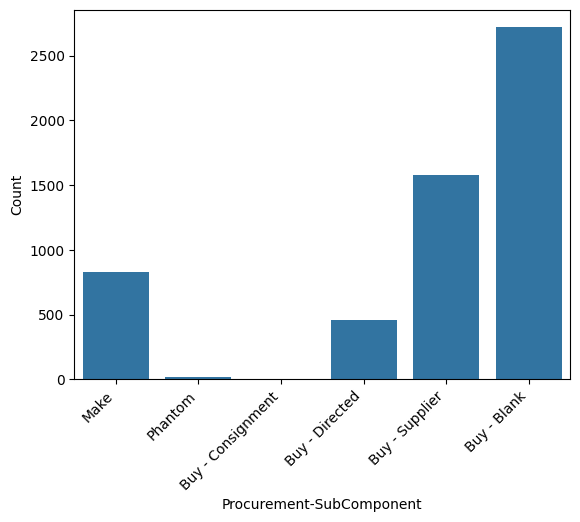

0.2529716549832368
0.006715701950751519
0.0
0.3510392609699769
0.3433224755700326
0.06440830646690689


In [17]:
## Graph by Procurement Code and Subcomponent Code
labels = ['Make', 'Phantom', 'Buy - Consignment', 'Buy - Directed', 'Buy - Supplier', 'Buy - Blank']
values = [0, 0, 0, 0, 0, 0]

for index, row in invalid_procurement_df.iterrows():
    procurement = row['Procurement Code']
    sub = row['Sub Component Code']

    if pd.isnull(procurement):
        continue
    elif 'Make' in procurement:
        values[0] += 1
    elif 'Phantom' in procurement:
        values[1] += 1
    elif 'Buy' in procurement:
        if pd.isnull(sub):
            values[5] += 1
        elif 'Consignment' in sub:
            values[2] += 1
        elif 'Directed' in sub:
            values[3] += 1
        elif 'Supplier' in sub:
            values[4] += 1

ax = sbn.barplot(x=labels, y=values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.xlabel('Procurement-SubComponent')
plt.ylabel('Count')
plt.show()

## Get percentage of invalid parts
valid_values = [0, 0, 0, 0, 0, 0]

for index, row in valid_df.iterrows():
    procurement = row['Procurement Code']
    sub = row['Sub Component Code']

    if pd.isnull(procurement):
        continue
    elif 'Make' in procurement:
        valid_values[0] += 1
    elif 'Phantom' in procurement:
        valid_values[1] += 1
    elif 'Buy' in procurement:
        if pd.isnull(sub):
            valid_values[5] += 1
        elif 'Consignment' in sub:
            valid_values[2] += 1
        elif 'Directed' in sub:
            valid_values[3] += 1
        elif 'Supplier' in sub:
            valid_values[4] += 1

for i in range(len(valid_values)):
    if valid_values[i] == 0: valid_values[i] = 1
    print(values[i]/valid_values[i])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ddfdb32-5dab-4ae1-a91f-0b0394a5c1eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>